<a href="https://colab.research.google.com/github/ihsanalhafiz/annda/blob/main/Lab1a_ANNDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

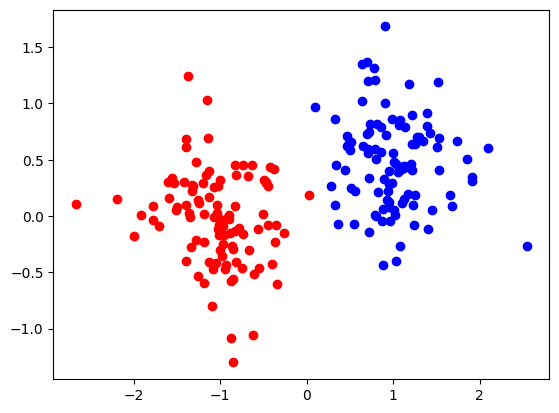

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# generate data for perceptron classification
n = 100
mA = np.array([1.0, 0.5])
sigmaA = 0.4
mB = np.array([-1.0, 0.0])
sigmaB = 0.4

classA = np.zeros((2, n))
classB = np.zeros((2, n))

classA[0, :] = np.random.randn(n) * sigmaA + mA[0]
classA[1, :] = np.random.randn(n) * sigmaA + mA[1]
classB[0, :] = np.random.randn(n) * sigmaB + mB[0]
classB[1, :] = np.random.randn(n) * sigmaB + mB[1]

# plot the data
plt.plot(classA[0, :], classA[1, :], 'bo')
plt.plot(classB[0, :], classB[1, :], 'ro')
plt.show()
